# 1. Reading our MoMA Data Set

We'll learn how to:

* Calculate how old the artist was when they created their artwork.
* Analyze and interpret the distribution of artist ages.
* Create functions which summarize our data.
* Print summaries in an easy-to-read-way.

In [2]:
from csv import reader

moma=reader(open('C:/Users/krishna/Desktop/GITHUB~1/DATA-A~2/Datasets/step_1/C2/artworks_clean.csv',encoding='utf-8'))

#convert above data file into list of list format
moma=list(moma)

 Even though we converted the numeric columns to integer types in the previous mission, when we saved the results as a CSV, they became text data again:
 Even though we don't have to clean the data again, we do have to convert these values to numeric types so we can analyze them. You may remember that some of the rows have missing values, so we'll need to handle those as well.

In [3]:
column_names=moma[:1]
column_names

[['Title',
  'Artist',
  'Nationality',
  'BeginDate',
  'EndDate',
  'Gender',
  'Date',
  'Department']]

In [4]:
moma=moma[1:]

In [10]:
for row in moma[:5]:
    print(row)
print(column_names)

['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', 'American', '1947', '2013', 'Female', '1986', 'Prints & Illustrated Books']
['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', 'Spanish', '1916', '2007', 'Male', '1978', 'Prints & Illustrated Books']
['Tailpiece (page 55) from SAGESSE', 'Maurice Denis', 'French', '1870', '1943', 'Male', '1900', 'Prints & Illustrated Books']
['Headpiece (page 129) from LIVRET DE FOLASTRIES, À JANOT PARISIEN', 'Aristide Maillol', 'French', '1861', '1944', 'Male', '1934', 'Prints & Illustrated Books']
['97 rue du Bac', 'Eugène Atget', 'French', '1857', '1927', 'Male', '1903', 'Photography']
[['Title', 'Artist', 'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date', 'Department']]


In [13]:
# convert values of 'BeginDate' to int
for row in moma:
    birth_date=row[3]
    if birth_date !='':
        row[3]=int(birth_date)        

In [15]:
# convert values of 'EndDate' to int
for row in moma:
    death_date=row[4]
    if death_date !='':
        row[4]=int(death_date)    

In [16]:
# convert values of 'Date' to int
for row in moma:
    date=row[6]
    if date !='':
        row[6]=int(date)    

# 2. Calculating Artist Ages

There are a handful of cases where the artist's age (according to our data set) is very low, including some where the age is negative. We could investigate these specific cases one by one, but since we're looking for a summary, we'll take care of these by categorizing artists younger than 20 as "Unknown" also.

In [21]:
# calculate age and replace '' with 0 value
ages=[]
for row in moma:
    work_date=row[6]
    birth_date=row[3]
    if type(birth_date)==int and type(work_date)==int:
        age=work_date-birth_date
        ages.append(age)
    else:
        age=0
        ages.append(age)
        

In [22]:
# Replace age<20 with Unknown
final_ages=[]
for age in ages:
    if age<20:
        final_ages.append('Unknown')
    else:
        final_ages.append(age)

In [24]:
print(final_ages)

[39, 62, 30, 73, 46, 38, 67, 52, 37, 59, 49, 28, 39, 40, 42, 54, 45, 31, 57, 47, 40, 35, 34, 48, 59, 58, 27, 47, 55, 51, 36, 'Unknown', 52, 30, 39, 39, 'Unknown', 34, 70, 39, 65, 29, 24, 42, 47, 46, 40, 45, 73, 37, 62, 56, 32, 40, 36, 67, 'Unknown', 46, 60, 34, 92, 39, 40, 44, 76, 41, 52, 42, 44, 56, 49, 30, 45, 62, 65, 52, 68, 53, 35, 54, 47, 64, 47, 54, 28, 29, 62, 20, 35, 63, 'Unknown', 52, 46, 40, 44, 27, 65, 48, 46, 50, 28, 77, 39, 25, 49, 43, 34, 29, 45, 'Unknown', 43, 51, 58, 45, 24, 56, 32, 48, 35, 34, 49, 93, 36, 30, 44, 92, 27, 32, 44, 39, 49, 54, 58, 37, 30, 23, 52, 'Unknown', 56, 48, 60, 36, 33, 34, 30, 43, 32, 44, 42, 28, 28, 59, 33, 36, 32, 25, 50, 49, 26, 39, 58, 49, 30, 58, 53, 32, 86, 45, 50, 50, 74, 31, 42, 24, 'Unknown', 37, 42, 'Unknown', 57, 91, 48, 40, 93, 39, 32, 'Unknown', 58, 53, 41, 43, 30, 73, 31, 56, 62, 45, 99, 56, 46, 57, 32, 51, 36, 41, 33, 29, 35, 39, 28, 31, 32, 65, 43, 31, 38, 44, 56, 43, 58, 26, 37, 35, 31, 35, 75, 38, 34, 33, 37, 'Unknown', 45, 37, 3

# 3. Converting Ages to Decades

We now have a list — ages — containing the artist ages during which each artwork was produced. Because there are many unique ages, we'll calculate only the decade in which the artist created each work. For instance, if we calculate that the artist was 24, we'll record that as the artist being in their "20s."

In [26]:
decades=[]

for age in final_ages:
    if age !='Unknown':
        age=str(age)
        age=age[:-1]
        decade=age+'0s'
        decades.append(decade)
    else:
        decades.append(age)

In [27]:
print(decades)

['30s', '60s', '30s', '70s', '40s', '30s', '60s', '50s', '30s', '50s', '40s', '20s', '30s', '40s', '40s', '50s', '40s', '30s', '50s', '40s', '40s', '30s', '30s', '40s', '50s', '50s', '20s', '40s', '50s', '50s', '30s', 'Unknown', '50s', '30s', '30s', '30s', 'Unknown', '30s', '70s', '30s', '60s', '20s', '20s', '40s', '40s', '40s', '40s', '40s', '70s', '30s', '60s', '50s', '30s', '40s', '30s', '60s', 'Unknown', '40s', '60s', '30s', '90s', '30s', '40s', '40s', '70s', '40s', '50s', '40s', '40s', '50s', '40s', '30s', '40s', '60s', '60s', '50s', '60s', '50s', '30s', '50s', '40s', '60s', '40s', '50s', '20s', '20s', '60s', '20s', '30s', '60s', 'Unknown', '50s', '40s', '40s', '40s', '20s', '60s', '40s', '40s', '50s', '20s', '70s', '30s', '20s', '40s', '40s', '30s', '20s', '40s', 'Unknown', '40s', '50s', '50s', '40s', '20s', '50s', '30s', '40s', '30s', '30s', '40s', '90s', '30s', '30s', '40s', '90s', '20s', '30s', '40s', '30s', '40s', '50s', '50s', '30s', '30s', '20s', '50s', 'Unknown', '50s', '4

# 4. Summarizing the Decade Data

* Calculated the age of the artist when each artwork was created.
* Simplified those ages to a list of "decades" so there were fewer unique values.

The last step of our analysis is to count how many instances of each decade there are. To do this, we're going to use a technique from the Python Fundamentals course: constructing a frequency table.

In [30]:
decades_frequency={}

for decade in decades:
    if decade in decades_frequency:
        decades_frequency[decade]+=1
    else:
        decades_frequency[decade]=1

In [31]:
print(decades_frequency)

{'30s': 4722, '60s': 1357, '70s': 559, '40s': 4081, '50s': 2434, '20s': 1886, 'Unknown': 1063, '90s': 253, '80s': 364, '100s': 3, '110s': 3}


# 5. Inserting Variables Into Strings

In [33]:
# approach 1 is inserting using string concatenation

name='Anshu'
age='21'
output= 'my name is'+' '+name+' '+'age is '+age
print(output)

my name is Anshu age is 21


In [34]:
# Approach 2 is using str.format function

name='Anshu'
age='21'
data= 'my name is {} and age is {}'
print(data.format(name,age))

my name is Anshu and age is 21


# 6. Creating an Artist Frequency Table

In [35]:
artist_freq={}
for row in moma:
    if row[1] in artist_freq:
        artist_freq[row[1]]+=1
    else:
        artist_freq[row[1]]=1

In [36]:
print(artist_freq)

{'Sarah Charlesworth': 1, 'Pablo Palazuelo': 4, 'Maurice Denis': 71, 'Aristide Maillol': 77, 'Eugène Atget': 705, 'Antonio Frasconi': 41, 'Garry Winogrand': 47, 'Diane Victor': 4, 'David Brown Milne': 2, 'Jean Dubuffet': 206, 'Jim Dine': 57, 'František Kupka': 37, 'Franklin Chenault Watkins': 4, 'Christopher Wool': 19, 'Abraham Walkowitz': 19, 'Pierre Alechinsky': 67, 'Frank Stella': 17, 'Frank Lloyd Wright': 112, 'Vicente Rojo': 5, 'Ludwig Mies van der Rohe': 318, 'Varvara Stepanova': 6, 'Richard Serra': 4, 'Robert Filliou': 15, 'Roger Chancel': 3, 'Pierre Bonnard': 129, 'Jacqueline Poncelet': 1, 'Émile Bernard': 83, 'Georg Baselitz': 14, 'Frans Masereel': 34, 'Unknown': 448, 'Sol LeWitt': 89, 'James Tenney': 1, 'Claes Oldenburg': 12, 'Dieter Roth': 18, 'Moisei Fradkin': 1, 'Richard Lindner': 1, 'Wojciech Prazmowski': 2, 'Thomas Bewick': 49, 'Spencer Sweeney': 2, 'Batiste Madalena': 5, 'On Kawara': 9, 'Andy Warhol': 41, 'Lee Friedlander': 180, 'Joan Miró': 78, 'Marc Chagall': 173, 'Ro

# 7. Creating an Artist Summary Function

Create a function that displays information for a specific artist.

In [37]:
def artist_summary(name):
    print('There are {} artworks done by {} in dataset'.format(artist_freq[name],name))

In [38]:
for artist in artist_freq:
    artist_summary(artist)

There are 1 artworks done by Sarah Charlesworth in dataset
There are 4 artworks done by Pablo Palazuelo in dataset
There are 71 artworks done by Maurice Denis in dataset
There are 77 artworks done by Aristide Maillol in dataset
There are 705 artworks done by Eugène Atget in dataset
There are 41 artworks done by Antonio Frasconi in dataset
There are 47 artworks done by Garry Winogrand in dataset
There are 4 artworks done by Diane Victor in dataset
There are 2 artworks done by David Brown Milne in dataset
There are 206 artworks done by Jean Dubuffet in dataset
There are 57 artworks done by Jim Dine in dataset
There are 37 artworks done by František Kupka in dataset
There are 4 artworks done by Franklin Chenault Watkins in dataset
There are 19 artworks done by Christopher Wool in dataset
There are 19 artworks done by Abraham Walkowitz in dataset
There are 67 artworks done by Pierre Alechinsky in dataset
There are 17 artworks done by Frank Stella in dataset
There are 112 artworks done by F

There are 1 artworks done by Julio Larraz in dataset
There are 1 artworks done by Burton Rice in dataset
There are 1 artworks done by Yinka Shonibare in dataset
There are 2 artworks done by Lutz Mommartz in dataset
There are 1 artworks done by Campbell Scott in dataset
There are 3 artworks done by Antonio Segui in dataset
There are 3 artworks done by John Levee in dataset
There are 1 artworks done by Carlo Scarpa in dataset
There are 1 artworks done by Ivan Kliun in dataset
There are 1 artworks done by Gugelot Institute in dataset
There are 3 artworks done by Benni Efrat in dataset
There are 1 artworks done by Don Brown in dataset
There are 2 artworks done by Myron Stout in dataset
There are 1 artworks done by Josef Sudek in dataset
There are 1 artworks done by Serge Rezvani in dataset
There are 2 artworks done by Michael Kalil in dataset
There are 1 artworks done by Günther Ssymmank in dataset
There are 1 artworks done by Fotograms in dataset
There are 2 artworks done by Heinz Veuhoff

# 8. Formatting Numbers Inside Strings

One other powerful usage of str.format() method is its ability to help us apply formatting to numbers as they are inserted into the string. 

* We specify number formatting, including things like precision, by adding one of various format specifications inside the braces ({}) of our string
* To indicate the precision of two, we specify :.2f after the name or position of our argument:

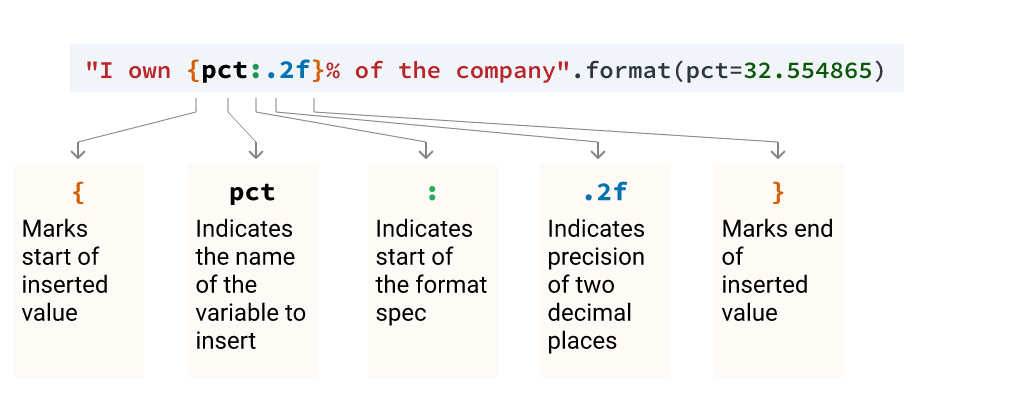

In [44]:
pop_millions = [
    ["China", 1379.302771],
    ["India", 1281.935991],
    ["USA",  326.625791],
    ["Indonesia",  260.580739],
    ["Brazil",  207.353391],
]
for p in pop_millions:
    c_name=p[0]
    c_pop=p[1]
    print("The population of {} is {b:.2f} million".format(c_name,b=c_pop))

The population of China is 1379.30 million
The population of India is 1281.94 million
The population of USA is 326.63 million
The population of Indonesia is 260.58 million
The population of Brazil is 207.35 million


 # 9.Challenge: Summarizing Artwork Gender Data

In [45]:
gender_freq={}
for row in moma:
    if row[-3] in gender_freq:
        gender_freq[row[-3]]+=1
    else:
        gender_freq[row[-3]]=1

In [52]:
for gender,num in gender_freq.items():
    template = "There are {n:,} artworks by {g} artists"
    print(template.format(g=gender, n=num))

There are 2,443 artworks by Female artists
There are 13,491 artworks by Male artists
There are 791 artworks by Gender Unknown/Other artists


In this mission, we learned how to:

* Create logic to analyze artist age data.
* Create frequency table dictionaries.
* Easily insert values into strings to summarize the results of our analysis.
* Format numbers inside of strings to make things easier to understand.